In [1]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_main = pd.read_csv('anncomp_full_data.csv')
df_small = df_main[['YEAR', 'SIC', 'SICDESC', 'OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']]


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (77,80,96) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Aggregate Ratio All Industries**

This is the ratio of exercised options to all options that the executive has regardless whether they are able to exercise the option or not. 

OPT_EXER_NUM / (OPT_EXER_NUM + OPT_UNEX_EXER_NUM + OPT_UNEX_UNEXER_NUM)

* OPT_EXER_NUM: Number of options exercised by the executive during the year.
* OPT_UNEX_EXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were vested.
* OPT_UNEX_UNEXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were not yet vested.

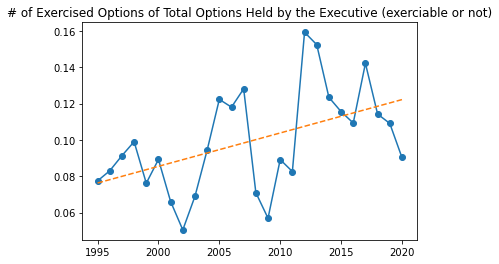

In [2]:
total = df_small[['YEAR', 'OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']]
total =total[(total['YEAR'] >= 1995)]
#total =total[(total['YEAR'] >= 1992)]
total = total.groupby('YEAR').sum()
total=total.reset_index()
ratio = total['OPT_EXER_NUM']/ (total['OPT_EXER_NUM']+ total['OPT_UNEX_EXER_NUM']+ total['OPT_UNEX_UNEXER_NUM'])

z = np.polyfit(total['YEAR'], ratio, 1)
p = np.poly1d(z)

plt.plot(total['YEAR'], ratio, marker='o')
plt.plot(total['YEAR'], p(total['YEAR']),'--')
plt.title('# of Exercised Options of Total Options Held by the Executive (exerciable or not)')

plt.savefig('Figures/ratio_exercise_granted_95.pdf',bbox_inches = "tight")
plt.show()

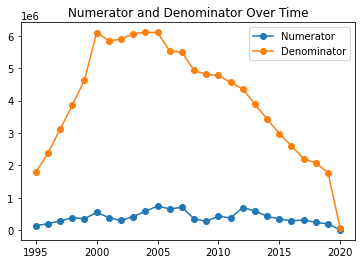

In [9]:
plt.plot(total['YEAR'], total['OPT_EXER_NUM'], marker='o')
plt.plot(total['YEAR'], (total['OPT_EXER_NUM']+ total['OPT_UNEX_EXER_NUM']+ total['OPT_UNEX_UNEXER_NUM']), marker='o')
plt.title('Numerator and Denominator Over Time')
plt.legend(['Numerator','Denominator'])
plt.savefig('Figures/ratio_exercise_granted_95_num_dem.pdf',bbox_inches = "tight")
plt.show()

**Aggregate Ratio Version 2 All Industries**

Only difference is that OPT_UNEX_UNEXER_NUM not included. This is the ratio of exercised options to all options that the executive is able to exercise. 

OPT_EXER_NUM / (OPT_EXER_NUM + OPT_UNEX_EXER_NUM)

* OPT_EXER_NUM: Number of options exercised by the executive during the year.
* OPT_UNEX_EXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were vested.
* OPT_UNEX_UNEXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were not yet vested.



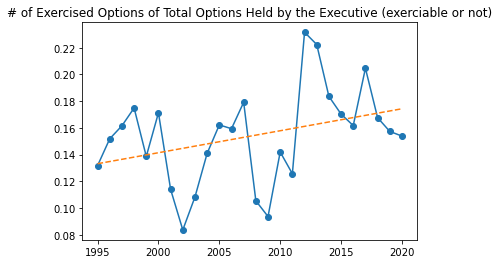

In [4]:
total = df_small[['YEAR', 'OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']]
total =total[(total['YEAR'] >= 1995)]
total = total.groupby('YEAR').sum()
total=total.reset_index()
ratio = total['OPT_EXER_NUM']/ (total['OPT_EXER_NUM']+ total['OPT_UNEX_EXER_NUM'])

z = np.polyfit(total['YEAR'], ratio, 1)
p = np.poly1d(z)

plt.plot(total['YEAR'], ratio, marker='o')
plt.plot(total['YEAR'], p(total['YEAR']),'--')
plt.title('# of Exercised Options of Total Options Held by the Executive (exerciable or not)')

plt.savefig('Figures/ratio_exercise_granted_new_95.pdf',bbox_inches = "tight")
plt.show()

**Aggregate Ratio by Industries**

This is the ratio of exercised options to all options that the executive has regardless whether they are able to exercise the option or not. 

OPT_EXER_NUM / (OPT_EXER_NUM + OPT_UNEX_EXER_NUM + OPT_UNEX_UNEXER_NUM)

* OPT_EXER_NUM: Number of options exercised by the executive during the year.
* OPT_UNEX_EXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were vested.
* OPT_UNEX_UNEXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were not yet vested.

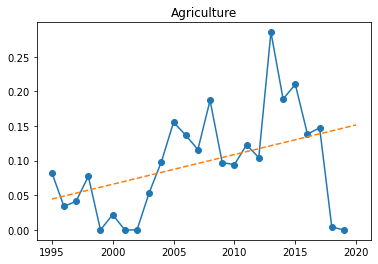

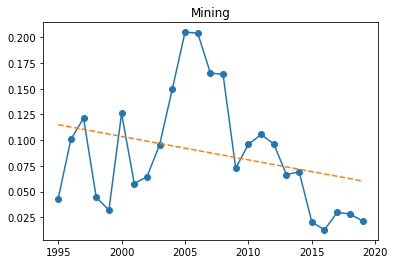

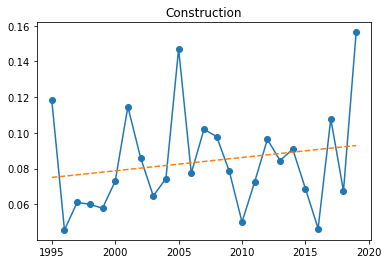

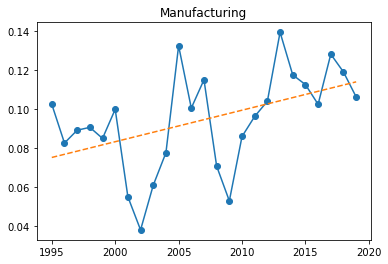

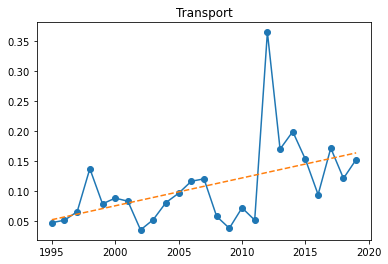

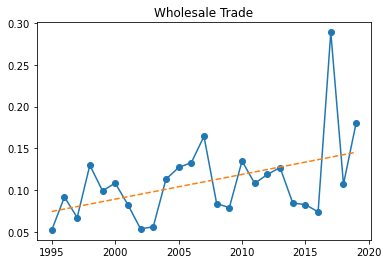

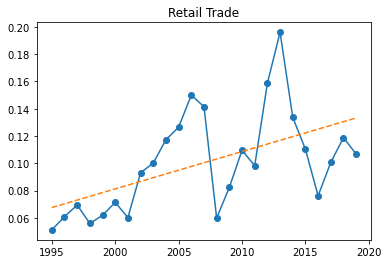

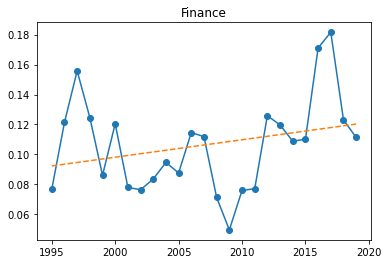

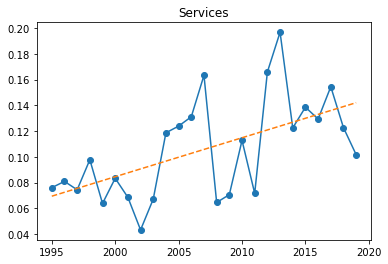

In [5]:
indus = df_small[['YEAR', 'SIC', 'OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']]
indus = indus[(indus['YEAR'] >= 1995) & (indus['YEAR']<2020)]



agri = indus[(indus['SIC'] >= 100) & (indus['SIC'] <=999)]
agri = agri[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
agri = agri.reset_index()

mining = indus[(indus['SIC'] >= 1000) & (indus['SIC']<=1499)]
mining = mining[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
mining = mining.reset_index()

construct = indus[(indus['SIC'] >= 1500) & (indus['SIC']<=1799)]
construct = construct[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
construct = construct.reset_index()

manu = indus[(indus['SIC'] >= 2000) & (indus['SIC']<=3999)]
manu = manu[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
manu = manu.reset_index()

transport = indus[(indus['SIC'] >= 4000) & (indus['SIC']<=4999)]
transport = transport[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
transport = transport.reset_index()

wholesale_trade = indus[(indus['SIC'] >= 5000) & (indus['SIC']<=5199)]
wholesale_trade = wholesale_trade[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
wholesale_trade = wholesale_trade.reset_index()


retail_trade = indus[(indus['SIC'] >= 5200) & (indus['SIC']<=5999)]
retail_trade = retail_trade[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
retail_trade = retail_trade.reset_index()


finance = indus[(indus['SIC'] >= 6000) & (indus['SIC']<=6799)]
finance = finance[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
finance = finance.reset_index()

services = indus[(indus['SIC'] >= 7000) & (indus['SIC']<=8999)]
services = services[['YEAR','OPT_EXER_NUM', 'OPT_UNEX_EXER_NUM', 'OPT_UNEX_UNEXER_NUM']].groupby('YEAR').sum()
services = services.reset_index()


agri_ratio =  agri['OPT_EXER_NUM']/ (agri['OPT_EXER_NUM']+ agri['OPT_UNEX_EXER_NUM']+ agri['OPT_UNEX_UNEXER_NUM'])
agri_ratio = agri_ratio.fillna(0)

mining_ratio =  mining['OPT_EXER_NUM']/ (mining['OPT_EXER_NUM']+ mining['OPT_UNEX_EXER_NUM']+ mining['OPT_UNEX_UNEXER_NUM'])
mining_ratio = mining_ratio.fillna(0)

construct_ratio =  construct['OPT_EXER_NUM']/ (construct['OPT_EXER_NUM']+ construct['OPT_UNEX_EXER_NUM']+ construct['OPT_UNEX_UNEXER_NUM'])
construct_ratio = construct_ratio.fillna(0)

manu_ratio =  manu['OPT_EXER_NUM']/ (manu['OPT_EXER_NUM']+ manu['OPT_UNEX_EXER_NUM']+ manu['OPT_UNEX_UNEXER_NUM'])
manu_ratio = manu_ratio.fillna(0)

transport_ratio =  transport['OPT_EXER_NUM']/ (transport['OPT_EXER_NUM']+ transport['OPT_UNEX_EXER_NUM']+ transport['OPT_UNEX_UNEXER_NUM'])
transport_ratio = transport_ratio.fillna(0)

wholesale_trade_ratio =  wholesale_trade['OPT_EXER_NUM']/ (wholesale_trade['OPT_EXER_NUM']+ wholesale_trade['OPT_UNEX_EXER_NUM']+ wholesale_trade['OPT_UNEX_UNEXER_NUM'])
wholesale_trade_ratio = wholesale_trade_ratio.fillna(0)

retail_trade_ratio =  retail_trade['OPT_EXER_NUM']/ (retail_trade['OPT_EXER_NUM']+ retail_trade['OPT_UNEX_EXER_NUM']+ retail_trade['OPT_UNEX_UNEXER_NUM'])
retail_trade_ratio = retail_trade_ratio.fillna(0)

finance_ratio =  finance['OPT_EXER_NUM']/ (finance['OPT_EXER_NUM']+ finance['OPT_UNEX_EXER_NUM']+ finance['OPT_UNEX_UNEXER_NUM'])
finance_ratio = finance_ratio.fillna(0)

services_ratio =  services['OPT_EXER_NUM']/ (services['OPT_EXER_NUM']+ services['OPT_UNEX_EXER_NUM']+ services['OPT_UNEX_UNEXER_NUM'])
services_ratio = services_ratio.fillna(0)


z = np.polyfit(agri['YEAR'], agri_ratio, 1)
p = np.poly1d(z)
plt.plot(agri['YEAR'], agri_ratio,marker='o')
plt.plot(total['YEAR'], p(total['YEAR']),'--')
plt.title('Agriculture')
plt.savefig('Figures/Industries/ratio_exercise_granted_agri.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(mining['YEAR'], mining_ratio, 1)
p = np.poly1d(z)
plt.plot(mining['YEAR'], mining_ratio,marker='o')
plt.plot(mining['YEAR'], p(mining['YEAR']),'--')
plt.title('Mining')
plt.savefig('Figures/Industries/ratio_exercise_granted_mining.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(construct['YEAR'], construct_ratio, 1)
p = np.poly1d(z)
plt.plot(construct['YEAR'], construct_ratio,marker='o')
plt.plot(construct['YEAR'], p(construct['YEAR']),'--')
plt.title('Construction')
plt.savefig('Figures/Industries/ratio_exercise_granted_construct.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(manu['YEAR'], manu_ratio, 1)
p = np.poly1d(z)
plt.plot(manu['YEAR'], manu_ratio,marker='o')
plt.plot(manu['YEAR'], p(manu['YEAR']),'--')
plt.title('Manufacturing')
plt.savefig('Figures/Industries/ratio_exercise_granted_manu.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(transport['YEAR'], transport_ratio, 1)
p = np.poly1d(z)
plt.plot(transport['YEAR'], transport_ratio,marker='o')
plt.plot(transport['YEAR'], p(transport['YEAR']),'--')
plt.title('Transport')
plt.savefig('Figures/Industries/ratio_exercise_granted_transport.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(wholesale_trade['YEAR'], wholesale_trade_ratio, 1)
p = np.poly1d(z)
plt.plot(wholesale_trade['YEAR'], wholesale_trade_ratio,marker='o')
plt.plot(wholesale_trade['YEAR'], p(wholesale_trade['YEAR']),'--')
plt.title('Wholesale Trade')
plt.savefig('Figures/Industries/ratio_exercise_granted_wholesale_trade.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(retail_trade['YEAR'], retail_trade_ratio, 1)
p = np.poly1d(z)
plt.plot(retail_trade['YEAR'], retail_trade_ratio,marker='o')
plt.plot(retail_trade['YEAR'], p(retail_trade['YEAR']),'--')
plt.title('Retail Trade')
plt.savefig('Figures/Industries/ratio_exercise_retail_trade.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(finance['YEAR'], finance_ratio, 1)
p = np.poly1d(z)
plt.plot(finance['YEAR'], finance_ratio,marker='o')
plt.plot(finance['YEAR'], p(finance['YEAR']),'--')
plt.title('Finance')
plt.savefig('Figures/Industries/ratio_exercise_granted_finance.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(services['YEAR'], services_ratio, 1)
p = np.poly1d(z)
plt.plot(services['YEAR'], services_ratio,marker='o')
plt.plot(services['YEAR'], p(services['YEAR']),'--')
plt.title('Services')
plt.savefig('Figures/Industries/ratio_exercise_granted_services.pdf',bbox_inches = "tight")
plt.show()



**Aggregate Ratio by Industries**

This is the ratio of exercised options to all options that the executive is able to exercise. 

OPT_EXER_NUM / (OPT_EXER_NUM + OPT_UNEX_EXER_NUM + OPT_UNEX_UNEXER_NUM)

* OPT_EXER_NUM: Number of options exercised by the executive during the year.
* OPT_UNEX_EXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were vested.
* OPT_UNEX_UNEXER_NUM: The aggregate number of unexercised options held by the executive at fiscal year end that were not yet vested.

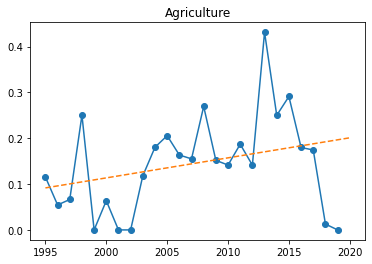

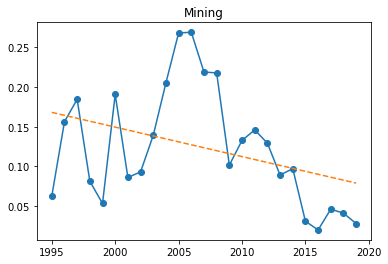

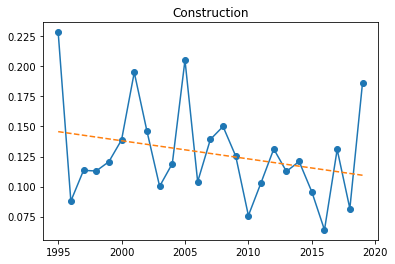

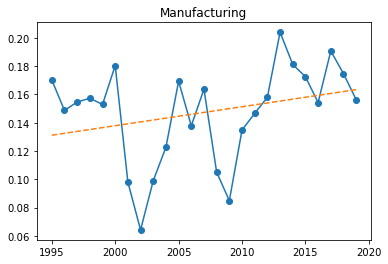

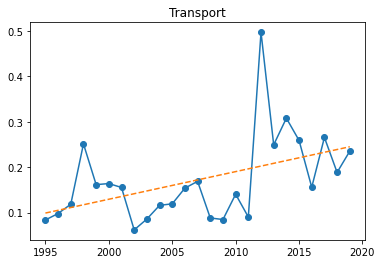

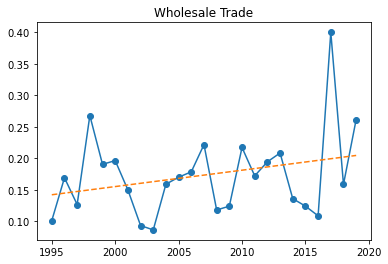

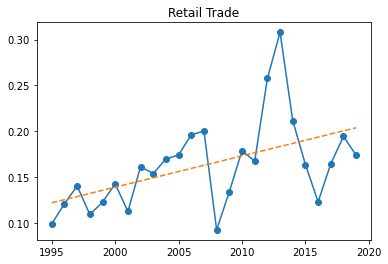

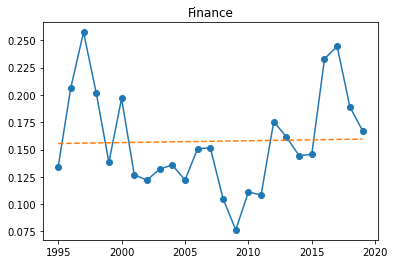

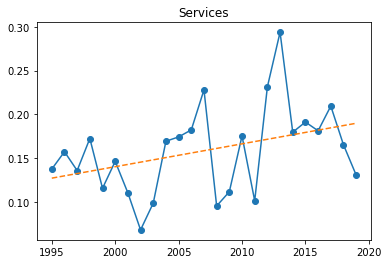

In [8]:


agri_ratio =  agri['OPT_EXER_NUM']/ (agri['OPT_EXER_NUM']+ agri['OPT_UNEX_EXER_NUM'])
agri_ratio = agri_ratio.fillna(0)

mining_ratio =  mining['OPT_EXER_NUM']/ (mining['OPT_EXER_NUM']+ mining['OPT_UNEX_EXER_NUM'])
mining_ratio = mining_ratio.fillna(0)

construct_ratio =  construct['OPT_EXER_NUM']/ (construct['OPT_EXER_NUM']+ construct['OPT_UNEX_EXER_NUM'])
construct_ratio = construct_ratio.fillna(0)

manu_ratio =  manu['OPT_EXER_NUM']/ (manu['OPT_EXER_NUM']+ manu['OPT_UNEX_EXER_NUM'])
manu_ratio = manu_ratio.fillna(0)

transport_ratio =  transport['OPT_EXER_NUM']/ (transport['OPT_EXER_NUM']+ transport['OPT_UNEX_EXER_NUM'])
transport_ratio = transport_ratio.fillna(0)

wholesale_trade_ratio =  wholesale_trade['OPT_EXER_NUM']/ (wholesale_trade['OPT_EXER_NUM']+ wholesale_trade['OPT_UNEX_EXER_NUM'])
wholesale_trade_ratio = wholesale_trade_ratio.fillna(0)

retail_trade_ratio =  retail_trade['OPT_EXER_NUM']/ (retail_trade['OPT_EXER_NUM']+ retail_trade['OPT_UNEX_EXER_NUM'])
retail_trade_ratio = retail_trade_ratio.fillna(0)

finance_ratio =  finance['OPT_EXER_NUM']/ (finance['OPT_EXER_NUM']+ finance['OPT_UNEX_EXER_NUM'])
finance_ratio = finance_ratio.fillna(0)

services_ratio =  services['OPT_EXER_NUM']/ (services['OPT_EXER_NUM']+ services['OPT_UNEX_EXER_NUM'])
services_ratio = services_ratio.fillna(0)


z = np.polyfit(agri['YEAR'], agri_ratio, 1)
p = np.poly1d(z)
plt.plot(agri['YEAR'], agri_ratio,marker='o')
plt.plot(total['YEAR'], p(total['YEAR']),'--')
plt.title('Agriculture')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_agri_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(mining['YEAR'], mining_ratio, 1)
p = np.poly1d(z)
plt.plot(mining['YEAR'], mining_ratio,marker='o')
plt.plot(mining['YEAR'], p(mining['YEAR']),'--')
plt.title('Mining')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_mining_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(construct['YEAR'], construct_ratio, 1)
p = np.poly1d(z)
plt.plot(construct['YEAR'], construct_ratio,marker='o')
plt.plot(construct['YEAR'], p(construct['YEAR']),'--')
plt.title('Construction')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_construct_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(manu['YEAR'], manu_ratio, 1)
p = np.poly1d(z)
plt.plot(manu['YEAR'], manu_ratio,marker='o')
plt.plot(manu['YEAR'], p(manu['YEAR']),'--')
plt.title('Manufacturing')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_manu_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(transport['YEAR'], transport_ratio, 1)
p = np.poly1d(z)
plt.plot(transport['YEAR'], transport_ratio,marker='o')
plt.plot(transport['YEAR'], p(transport['YEAR']),'--')
plt.title('Transport')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_transport_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(wholesale_trade['YEAR'], wholesale_trade_ratio, 1)
p = np.poly1d(z)
plt.plot(wholesale_trade['YEAR'], wholesale_trade_ratio,marker='o')
plt.plot(wholesale_trade['YEAR'], p(wholesale_trade['YEAR']),'--')
plt.title('Wholesale Trade')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_wholesale_trade_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(retail_trade['YEAR'], retail_trade_ratio, 1)
p = np.poly1d(z)
plt.plot(retail_trade['YEAR'], retail_trade_ratio,marker='o')
plt.plot(retail_trade['YEAR'], p(retail_trade['YEAR']),'--')
plt.title('Retail Trade')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_retail_trade_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(finance['YEAR'], finance_ratio, 1)
p = np.poly1d(z)
plt.plot(finance['YEAR'], finance_ratio,marker='o')
plt.plot(finance['YEAR'], p(finance['YEAR']),'--')
plt.title('Finance')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_finance_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

z = np.polyfit(services['YEAR'], services_ratio, 1)
p = np.poly1d(z)
plt.plot(services['YEAR'], services_ratio,marker='o')
plt.plot(services['YEAR'], p(services['YEAR']),'--')
plt.title('Services')
plt.savefig('Figures/_no_unex_unexer/ratio_exercise_granted_services_no_unex_unexer.pdf',bbox_inches = "tight")
plt.show()

